# <b> The Battle of Neighborhoods
### <b> Capstone project for Coursera IBM Data science professional certificate

### <b> Pierayeh Vahdani

### Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Analysis](#results)
* [Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem 

Vancouver with a population of 2,581,000 and Toronto with a population of 6,197,000 are Canada's two metropolitan cities. Although Vancouver has a population of about less than half of that of Toronto but it is still competing very closely with Toronto in terms of restaurants  and cafes. 

&nbsp;&nbsp;&nbsp;&nbsp;In this project, I will compare the neighborhood of the two city. This report is specifically targeted a chain restaurant that would like to open a new branch in each city and tries to search to find the best
location and a customized menu for each location. The chain considers 2 factors to decide about the location and the menu as follow: 

   1. The location should be in a popular neighborhood that can attract visitors. 
   2. The menu for each location should includes foods that are less offered by other restaurants in the         that neighborhood.  

# Data 

Following data sources will be needed to extract/generate the required information:
1. centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Wikipedia**
2. number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**
3. coordinate of Vancouver will be obtained using ** The government of British Columbi's BC Address Geocoder website **. 

# Methodeology 

Based on definition of our problem, factors that will influence our decision are:

1. Location: 
* Number of existing restaurants and other public venues such as parks, beaches, museums in the neighborhood. 
* Distance of neighborhood from city center. 
2. The menu:
* The dishes that are less offered by the restaurants in that neighborhood.  

# Results and Analysis 

## Segmenting and Clustering Neighborhoods in Vancouver

In this notebook I explored, segmented, and clustered the neighborhoods in the city of Vancouver. 
For the Vancouver neighborhood data, I used a Wikipedia page that has information I need to explore and cluster the neighborhoods in Vancouver. I collected the data for Vancouver neighborhood (The focus of this project is to explore merely the neighborhoods in downtown Vancouver and the city of Vancouver, therefor I only extract the data related to the postal codes in this two areas of lower mainland). I wrangled the data, cleaned it, and then read it into a pandas dataframe so that it is in a structured format.
Once the data is in a structured format, I explored and clustered the neighborhoods.

## Part 1: Creating a notebook by collecting the data from the Wikipedia page containing Vancouver neighborhood information.

Data from Wikipedia containing the borough, neighborhoods, and the associated postal codes is collected and converted to a pandas dataframe

In [5]:
df0=pd.read_csv('Vancouver_PostalCode.csv')

Data including Vancouver borough, postal codes, and their corresponding geographical information is obtained from the government of BC address Geocoder website and converted to a pandas dataframe

In [6]:
df1= pd.read_csv('addresses.csv')


I renamed some columns and reindexd the dataframe

In [15]:
Vancouver_Geo.head()

,Longitude,Latitude,PostalCode
0,-123.142289,49.303832,V5K
1,-123.142289,49.303832,V5L
2,-123.034651,49.249830,V5M
3,-123.067986,49.249830,V5N
4,-123.067984,49.216496,V5P


In [16]:
Vancouver_Ne.head()

,PostalCode,Borough,Neighborhood
0,V5K,Vancouver,"North Hastings, Sunrise"
1,V5L,Vancouver,"North grandview, Woodland"
2,V5M,Vancouver,"South Hastings, Sunrise, North Renfrew- Collin..."
3,V5N,Vancouver,"South Grandview, Woodland, Ne Kensington, Ceda..."
4,V5P,Vancouver,"SE Kensington, Cedar Cottage, Victoria drive, ..."


The two sets of data are merged together

In [20]:
Van_data=Vancouver_Ne.merge(Vancouver_Geo, on='PostalCode', how='inner')


In [21]:
Van_data

,PostalCode,Borough,Neighborhood,Longitude,Latitude
0,V5K,Vancouver,"North Hastings, Sunrise",-123.142289,49.303832
1,V5L,Vancouver,"North grandview, Woodland",-123.142289,49.303832
2,V5M,Vancouver,"South Hastings, Sunrise, North Renfrew- Collin...",-123.034651,49.249830
3,V5N,Vancouver,"South Grandview, Woodland, Ne Kensington, Ceda...",-123.067986,49.249830
4,V5P,Vancouver,"SE Kensington, Cedar Cottage, Victoria drive, ...",-123.067984,49.216496
5,V5R,Vancouver,"South Renfrew, Collingwood",-123.139155,49.300742
6,V5S,Vancouver,Killarney,-123.034650,49.216497
7,V5T,Vancouver,East Mount Pleasant,-123.154222,49.226656
8,V5V,Vancouver,"West Kensington, Cedar Cottage, North East Ri...",-123.075078,49.249125
9,V5W,Vancouver,"South East Riley, Park Little Mountain, SW Ken...",-123.084651,49.216496


## Part 2: Finding the geographical locations (lat and long) of each neighborhood in Vancouver

In [25]:
address = 'Vancouver'

geolocator = Nominatim(user_agent="Van_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [26]:
# create map of New York using latitude and longitude values
map_Vancouver = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Van_data['Latitude'], Van_data['Longitude'], Van_data['Borough'], Van_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver)  
    
map_Vancouver

**Created the map of Vancouver using the geographcal data**

## Part 3: Use FourSquare to explore and cluster venues in Vancouver 

In this section:
1. I used FourSquare to get 100 venues in Vancouver 
2. Explored and clustered the neighborhoods in Vancouver
3. Generated maps to visualize neighborhoods and how they cluster together

#### Let's explore the first neighborhood in our dataframe.

#### I got the top 100 venues that are in Vancouver within a radius of 500 m.

**As all the information is in the 'items' key, I used the 'get_category_type' **function.**

Then cleaned the json file and structured it into a *pandas* dataframe.

In [35]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Stanley Park,Park,49.302488,-123.141718
1,Wren Trail,Trail,49.302527,-123.142399
2,Propesct Point Picnic Site,Park,49.303014,-123.146194
3,Beaver Lake,Lake,49.305053,-123.138252
4,Squirrel trail,Trail,49.303553,-123.147097
5,Beaver Lake Trail,Trail,49.303440,-123.137298


Then repeated the same process to all the neighborhoods in Vancouver

In [39]:
print(Vancouver_venues.shape)
Vancouver_venues.head()

(720, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"North Hastings, Sunrise",49.303832,-123.142289,Stanley Park,49.302488,-123.141718,Park
1,"North Hastings, Sunrise",49.303832,-123.142289,Wren Trail,49.302527,-123.142399,Trail
2,"North Hastings, Sunrise",49.303832,-123.142289,Propesct Point Picnic Site,49.303014,-123.146194,Park
3,"North Hastings, Sunrise",49.303832,-123.142289,Beaver Lake,49.305053,-123.138252,Lake
4,"North Hastings, Sunrise",49.303832,-123.142289,Squirrel trail,49.303553,-123.147097,Trail


In [40]:
Vancouver_venues_grouped=Vancouver_venues.groupby('Neighborhood').count()
Vancouver_venues_top3=Vancouver_venues_grouped.sort_values(by='Venue', ascending=False).head(3)
Vancouver_venues_top3

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"West Mount Pleasant, West Riley Park, Little Mountain",76,76,76,76,76,76
SW Downtown,76,76,76,76,76,76
"North West Dunbar, Southlands, Chaldecutt, South University Endowment Lands",76,76,76,76,76,76


Then I found the top 5 venues in each neighborhood

According to the table above, 5 neighborhoods with the largest number of venues are: 
1. West Mount Pleasant, West Riley Park, Little Mountain 
2. North West Dunbar, Southlands, Chaldecutt, South University Endowment Lands
3. SW Downtown

In [46]:
num_top_venues = 5

for hood in Vancouver_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Vancouver_grouped[Vancouver_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- West Kensington, Cedar Cottage, North East Riley Park, Little Mountain ----
                           venue  freq
0          Vietnamese Restaurant  0.17
1  Vegetarian / Vegan Restaurant  0.09
2                           Café  0.04
3                   Burger Joint  0.04
4             Chinese Restaurant  0.04


----Bental Center ----
                venue  freq
0       Grocery Store  0.11
1      Hardware Store  0.05
2         Pizza Place  0.05
3  Dim Sum Restaurant  0.05
4           Pet Store  0.05


----Central Kitsilano, Greektown ----
                 venue  freq
0          Coffee Shop  0.13
1  Japanese Restaurant  0.07
2          Yoga Studio  0.03
3          Pizza Place  0.03
4                 Café  0.03


----East Fairview, South Cambie ----
           venue  freq
0           Park   0.4
1  Deli / Bodega   0.2
2    Flea Market   0.2
3    Coffee Shop   0.2
4   Outlet Store   0.0


----East Mount Pleasant----
         venue  freq
0     Bus Stop   0.3
1         Café   0.1
2  Pizza

Then created the new dataframe and display the top 10 venues for each neighborhood.

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Vancouver_grouped['Neighborhood']

for ind in np.arange(Vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Vancouver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"West Kensington, Cedar Cottage, North East Ri...",Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Smoke Shop,Grocery Store,Chinese Restaurant,South Indian Restaurant,Burger Joint,Liquor Store,Café,Supermarket
1,Bental Center,Grocery Store,Hardware Store,Big Box Store,Bus Stop,Shop & Service,Burger Joint,Liquor Store,Sporting Goods Shop,Clothing Store,Coffee Shop
2,"Central Kitsilano, Greektown",Coffee Shop,Japanese Restaurant,Yoga Studio,Diner,Pizza Place,Donut Shop,Farmers Market,Mexican Restaurant,Café,Malay Restaurant
3,"East Fairview, South Cambie",Park,Deli / Bodega,Flea Market,Coffee Shop,Event Space,Food Court,Food,Fish Market,Fast Food Restaurant,Farmers Market
4,East Mount Pleasant,Bus Stop,Pizza Place,Gift Shop,Health & Beauty Service,Café,Park,Bubble Tea Shop,Grocery Store,Flea Market,Fish Market
5,Killarney,Pizza Place,Grocery Store,Pharmacy,Sandwich Place,Chinese Restaurant,Recreation Center,Shopping Mall,Deli / Bodega,Video Store,Donut Shop
6,"North Hastings, Sunrise",Trail,Park,Lake,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
7,"North West Arbutus Ridge, North East Dunbar, S...",Café,Bank,Sandwich Place,Restaurant,Coffee Shop,Sushi Restaurant,Pub,Convenience Store,Bakery,Indian Restaurant
8,"North West Dunbar, Southlands, Chaldecutt, Sou...",Coffee Shop,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Grocery Store,Café,Gym,Mexican Restaurant,Liquor Store
9,"North West Shaughnessy, East Kitsilano, Quilch...",Coffee Shop,Japanese Restaurant,Yoga Studio,Diner,Pizza Place,Donut Shop,Farmers Market,Mexican Restaurant,Café,Malay Restaurant


In [49]:
Top3_neighborhoods=Vancouver_venues_top3.index.values
Top3_neighborhoods

array(['West Mount Pleasant, West Riley Park, Little Mountain ',
       'SW Downtown ',
       'North West Dunbar, Southlands, Chaldecutt, South University Endowment Lands'],
      dtype=object)

Among them, I found the top 10 venues in the 3 neighborhood with the largest number of venues

In [50]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood'].isin(Top3_neighborhoods)]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"North West Dunbar, Southlands, Chaldecutt, Sou...",Coffee Shop,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Grocery Store,Café,Gym,Mexican Restaurant,Liquor Store
15,SW Downtown,Bakery,Sushi Restaurant,Hotel,Boat or Ferry,Coffee Shop,Harbor / Marina,Gym,Chinese Restaurant,Seafood Restaurant,Sandwich Place
28,"West Mount Pleasant, West Riley Park, Little M...",Coffee Shop,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Grocery Store,Café,Gym,Mexican Restaurant,Liquor Store


Look at the top 10 most common venues in these three neighborhood, I can conclude that Asian style of food including 
sushi places, Japanese restaurant, Ramen resturant, Chinese Restaurant are the most common resturant and foods in these neigborhoods. 



In [ ]:
I performed the elbow method to find the optimized K number to cluster to perform K means Clustering. According to the analysis 

In [51]:
distortions = []
Vancouver_grouped_clustering= Vancouver_grouped.drop ('Neighborhood', 1)
for i in range(1, 11):
    km = KMeans(n_clusters = i, init='random', n_init=10, max_iter=300, random_state=0).fit(Vancouver_grouped_clustering)
    distortions.append(km.inertia_)


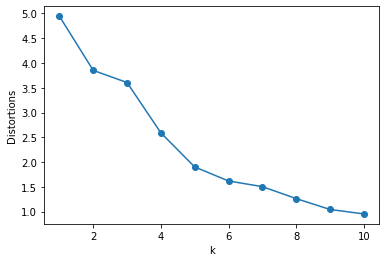

In [52]:
plt.plot(range(1,11), distortions, marker ='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.show()


Run *k*-means to cluster the neighborhood into 6 clusters.

In [54]:
# set number of clusters
kclusters = 6

Vancouver_grouped_clustering = Vancouver_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 4, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [55]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Vancouver_merged = Van_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Vancouver_merged = Vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Vancouver_merged # check the last columns!

,PostalCode,Borough,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,V5K,Vancouver,"North Hastings, Sunrise",-123.142289,49.303832,4.0,Trail,Park,Lake,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
1,V5L,Vancouver,"North grandview, Woodland",-123.142289,49.303832,4.0,Trail,Park,Lake,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
2,V5M,Vancouver,"South Hastings, Sunrise, North Renfrew- Collin...",-123.034651,49.249830,1.0,Convenience Store,Bookstore,Malay Restaurant,Supermarket,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market,Fast Food Restaurant
3,V5N,Vancouver,"South Grandview, Woodland, Ne Kensington, Ceda...",-123.067986,49.249830,1.0,Vietnamese Restaurant,Chinese Restaurant,Café,Burger Joint,Seafood Restaurant,Sandwich Place,Bank,Grocery Store,Yoga Studio,Fish Market
4,V5P,Vancouver,"SE Kensington, Cedar Cottage, Victoria drive, ...",-123.067984,49.216496,5.0,Middle Eastern Restaurant,Japanese Restaurant,Motorcycle Shop,Dim Sum Restaurant,Farmers Market,Food Truck,Food Court,Food,Flea Market,Fish Market
5,V5R,Vancouver,"South Renfrew, Collingwood",-123.139155,49.300742,1.0,Trail,Theme Park Ride / Attraction,Playground,Pub,Event Space,Music Venue,Lake,Garden,Outdoor Sculpture,Other Great Outdoors
6,V5S,Vancouver,Killarney,-123.034650,49.216497,1.0,Pizza Place,Grocery Store,Pharmacy,Sandwich Place,Chinese Restaurant,Recreation Center,Shopping Mall,Deli / Bodega,Video Store,Donut Shop
7,V5T,Vancouver,East Mount Pleasant,-123.154222,49.226656,1.0,Bus Stop,Pizza Place,Gift Shop,Health & Beauty Service,Café,Park,Bubble Tea Shop,Grocery Store,Flea Market,Fish Market
8,V5V,Vancouver,"West Kensington, Cedar Cottage, North East Ri...",-123.075078,49.249125,1.0,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Smoke Shop,Grocery Store,Chinese Restaurant,South Indian Restaurant,Burger Joint,Liquor Store,Café,Supermarket
9,V5W,Vancouver,"South East Riley, Park Little Mountain, SW Ken...",-123.084651,49.216496,3.0,Business Service,Park,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [56]:
Vancouver_merged_1=Vancouver_merged.dropna()

In [57]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Vancouver_merged_1['Latitude'], Vancouver_merged_1['Longitude'], Vancouver_merged_1['Neighborhood'], Vancouver_merged_1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [58]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 0, Vancouver_merged.columns[[1] + [2] + list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Vancouver,"South Shaughnessy, North West Oakridge, North ...",0.0,Italian Restaurant,Bakery,Caribbean Restaurant,Yoga Studio,Falafel Restaurant,Food Court,Food,Flea Market,Fish Market,Fast Food Restaurant


In [59]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 1, Vancouver_merged.columns[[1] + [2] + list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Vancouver,"South Hastings, Sunrise, North Renfrew- Collin...",1.0,Convenience Store,Bookstore,Malay Restaurant,Supermarket,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market,Fast Food Restaurant
3,Vancouver,"South Grandview, Woodland, Ne Kensington, Ceda...",1.0,Vietnamese Restaurant,Chinese Restaurant,Café,Burger Joint,Seafood Restaurant,Sandwich Place,Bank,Grocery Store,Yoga Studio,Fish Market
5,Vancouver,"South Renfrew, Collingwood",1.0,Trail,Theme Park Ride / Attraction,Playground,Pub,Event Space,Music Venue,Lake,Garden,Outdoor Sculpture,Other Great Outdoors
6,Vancouver,Killarney,1.0,Pizza Place,Grocery Store,Pharmacy,Sandwich Place,Chinese Restaurant,Recreation Center,Shopping Mall,Deli / Bodega,Video Store,Donut Shop
7,Vancouver,East Mount Pleasant,1.0,Bus Stop,Pizza Place,Gift Shop,Health & Beauty Service,Café,Park,Bubble Tea Shop,Grocery Store,Flea Market,Fish Market
8,Vancouver,"West Kensington, Cedar Cottage, North East Ri...",1.0,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Smoke Shop,Grocery Store,Chinese Restaurant,South Indian Restaurant,Burger Joint,Liquor Store,Café,Supermarket
11,Vancouver,"West Mount Pleasant, West Riley Park, Little M...",1.0,Coffee Shop,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Grocery Store,Café,Gym,Mexican Restaurant,Liquor Store
12,Vancouver,"East Fairview, South Cambie",1.0,Park,Deli / Bodega,Flea Market,Coffee Shop,Event Space,Food Court,Food,Fish Market,Fast Food Restaurant,Farmers Market
14,Vancouver,"Waterfron, Coal Harbour, Canada Place",1.0,Japanese Restaurant,Ramen Restaurant,Dessert Shop,Breakfast Spot,Harbor / Marina,Café,Coffee Shop,Seafood Restaurant,Boat or Ferry,Sandwich Place
15,Vancouver,"South East West End, Davie Village",1.0,Café,Mexican Restaurant,Bakery,Gay Bar,Indian Restaurant,Japanese Restaurant,Sushi Restaurant,Hotel,Grocery Store,Food Truck


In [60]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 2, Vancouver_merged.columns[[1] + [2] + list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Vancouver,"West Fairview, Granvile Iceland, Nort East Sha...",2.0,Print Shop,Electronics Store,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Donut Shop


In [61]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 3, Vancouver_merged.columns[[1] + [2] + list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Vancouver,"South East Riley, Park Little Mountain, SW Ken...",3.0,Business Service,Park,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
10,Vancouver,"SE Oakridge, East Marpole, South Sunset",3.0,Business Service,Park,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [62]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 4, Vancouver_merged.columns[[1] + [2] +list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Vancouver,"North Hastings, Sunrise",4.0,Trail,Park,Lake,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
1,Vancouver,"North grandview, Woodland",4.0,Trail,Park,Lake,Yoga Studio,Event Space,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
16,Vancouver,"North West West End, Stanely Park",4.0,Trail,Bus Stop,Garden,Park,Yoga Studio,Event Space,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market


In [63]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 5, Vancouver_merged.columns[[1] + [2] +list(range(5, Vancouver_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Vancouver,"SE Kensington, Cedar Cottage, Victoria drive, ...",5.0,Middle Eastern Restaurant,Japanese Restaurant,Motorcycle Shop,Dim Sum Restaurant,Farmers Market,Food Truck,Food Court,Food,Flea Market,Fish Market


# Discussion 

### 1. Vancouver neighborhoods 

As Discussed before  the  top 3 neighborhoods in Vancouver with the largest number of venues are: 
1. West Mount Pleasant, West Riley Park, Little Mountain 
2. North West Dunbar, Southlands, Chaldecutt, South University Endowment Lands
3. SW Downtown

All these neighborhoods are included in cluster number 2, which is the biggest cluster, shown in the figure with purple circles. Looking at top 10 most common venues in these neighborhoods, I concluded that Japanese, Chinese, Korean restaurants are the most common restaurants in these neighborhoods. Also, the most common common places in the second biggest cluster in Vancouver, cluster number 5, are Parks, lakes, and trials which attracts many visitors specially during weekends. 

Considering these observations through the analysis of the Vancouver neighborhoods, I would recommend to the chain restaurant to open a new branch in cluster number 2, best neighborhoods are those listed in the top 3 neighborhoods, or in the the neighborhoods within cluster number 5. Also, I recommend to customize the menu to include more Italian, Mexican, Mediterranean style of food. 

### 2. Toronto neighborhoods

Using the similar methodology, I performed the same analysis on city of Toronto (in a separate notebook). I include a discussion of the result of Toronto in this section. 

The top 10 neighborhoods in Toronto with largest number of venues are: 
1. First Canadian Place
2. Harbourfront East, Union Station, Toronto Islands
3. Garden District, Ryerson
4. Toronto Dominion Center, Design Exchange
5. Commerce Court, Victoria Hotel 
6. Stn A P0 Boxes 
7. Richmond, Adelaide, King
8. Church and Wellesley
9. St. James Town 
10. Central Bay Street

All these neighborhoods are included in cluster number 1, which is the biggest cluster, shown in the figure with purple circles. Looking at top 10 most common venues in these neighborhoods, I concluded that Japanese, Chinese, Korean restaurants are the most common restaurants in these neighborhoods. Also, the most common common places in the second biggest cluster in Vancouver, cluster number 5, are Parks, lakes, and trials which attracts many visitors specially during weekends. 

Considering these observations through the analysis of the Vancouver neighborhoods, I would recommend to the chain restaurant to open a new branch in cluster number 2, best neighborhoods are those listed in the top 3 neighborhoods, or in the the neighborhoods within cluster number 5. Also, I recommend to customize the menu to include more Italian, Mexican, Mediterranean style of food. 

# Conclusion:

In this project, I demonstrated how to cluster and segment different neighborhoods in the central part of the city of Toronto and the city of Vancouver based on the venues in these neighborhoods. 
I used the results of this analysis to recommend to a chain restaurant the best neighborhoods in these two cities a new branch an a customized menu which include the foods that are less commonly found in those neighborhoods. 

This project include Boroughs that are limited to the central part of the cities and not includes other interesting Boroughs, For example the data for North Vancouver and West Vancouver with potential attractive places was missing in this analysis. To improve the analysis, I would recommend to collect larger data set which includes other Boroughs to have a better understanding of different neighborhoods in both cities to open more branches in them.  